In [1]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 4s 0us/step


In [2]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [0]:
trans = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
]

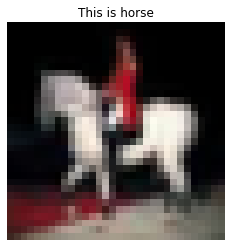

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
i = random.randint(0, x_train.shape[0]-1)
cat = trans[y_train[i][0]]
plt.title("This is {}".format(cat))
plt.axis("off")
plt.imshow(x_train[i])

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
model = Sequential()
# 3 * 3 * 3(一個filter) * 64 + 64 = 1792
model.add(Conv2D(64, 3,
                 padding="same",
                 activation="relu",
                 input_shape=(32, 32, 3)))
model.add(MaxPooling2D())
# 3 * 3 * 64(一個filter) * 128 + 128 = 73856
model.add(Conv2D(128, 3,
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(256, 3,
                 padding="same",
                 activation="relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         


In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [7]:
from keras.utils.np_utils import to_categorical
x_train_norm = x_train / 255
x_test_norm = x_test / 255
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)
print(y_test[0])
print(y_test_cat[0])

[3]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [8]:
model.fit(x_train_norm, 
          y_train_cat,
          batch_size=200,
          epochs=10,
          validation_split=0.1,
          verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 45000 samples, validate on 5000 samples
Epoch 1/10





 - 17s - loss: 1.6097 - acc: 0.4140 - val_loss: 1.2235 - val_acc: 0.5626
Epoch 2/10
 - 3s - loss: 1.1476 - acc: 0.5935 - val_loss: 1.0133 - val_acc: 0.6450
Epoch 3/10
 - 3s - loss: 0.9397 - acc: 0.6718 - val_loss: 0.8432 - val_acc: 0.7026
Epoch 4/10
 - 3s - loss: 0.8038 - acc: 0.7212 - val_loss: 0.8209 - val_acc: 0.7096
Epoch 5/10
 - 3s - loss: 0.7066 - acc: 0.7524 - val_loss: 0.7323 - val_acc: 0.7478
Epoch 6/10
 - 3s - loss: 0.6186 - acc: 0.7825 - val_loss: 0.7015 - val_acc: 0.7620
Epoch 7/10
 - 3s - loss: 0.5509 - acc: 0.8069 - val_loss: 0.6901 - val_acc: 0.7654
Epoch 8/10
 - 3s - loss: 0.4826 - acc: 0.8305 - val_loss: 0.6767 - val_acc: 0.7778
Epoch 9/10
 - 3s - loss: 0.4178 - acc: 0.8530 - val_loss: 0.6847 - val_acc: 0.7738
Epoch 10/10
 - 3s - loss: 0.3575 - acc: 0.8744 - val_loss: 0.7342 - val_acc: 0.7698


In [9]:
model.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 1s 88us/step


[0.7721692341804505, 0.7642]